In [1680]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline

In [1681]:
training = pd.read_csv('training_data.csv', encoding = "latin")
#training = pd.read_csv('test_data.csv', encoding = "latin")

In [1682]:
training = training.fillna('NOTHING')

In [1683]:
training['AVERAGE_CLOUDINESS'].value_counts()

NOTHING              2682
céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: AVERAGE_CLOUDINESS, dtype: int64

In [1684]:
training['AVERAGE_DISTANCE_FREE'] = training['AVERAGE_FREE_FLOW_TIME'] * training['AVERAGE_FREE_FLOW_SPEED']
training['AVERAGE_TIME'] = training['AVERAGE_TIME_DIFF'] + training['AVERAGE_FREE_FLOW_TIME'] 
training['AVERAGE_SPEED'] =  training['AVERAGE_DISTANCE_FREE'] / training['AVERAGE_TIME']
training['AVERAGE_SPEED_DIFF_Num'] =  training['AVERAGE_FREE_FLOW_SPEED'] - training['AVERAGE_SPEED']

In [1685]:
training.loc[training.AVERAGE_CLOUDINESS == 'céu claro', 'AVERAGE_CLOUDINESS'] = 'céu limpo'
training.loc[training.AVERAGE_CLOUDINESS == 'nuvens dispersas', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'nuvens quebrados', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'algumas nuvens', 'AVERAGE_CLOUDINESS'] = 'nuvens quebradas'
training.loc[training.AVERAGE_CLOUDINESS == 'tempo nublado', 'AVERAGE_CLOUDINESS'] = 'nublado'

In [1686]:
training['AVERAGE_CLOUDINESS'].value_counts()

NOTHING              2682
nuvens quebradas     1745
céu limpo            1735
céu pouco nublado     516
nublado               134
Name: AVERAGE_CLOUDINESS, dtype: int64

In [1687]:
training['AVERAGE_CLOUDINESS'] = pd.Categorical(training['AVERAGE_CLOUDINESS'])

In [1688]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city_name                6812 non-null   object  
 1   record_date              6812 non-null   object  
 2   AVERAGE_SPEED_DIFF       6812 non-null   object  
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64 
 4   AVERAGE_TIME_DIFF        6812 non-null   float64 
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64 
 6   LUMINOSITY               6812 non-null   object  
 7   AVERAGE_TEMPERATURE      6812 non-null   float64 
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64 
 9   AVERAGE_HUMIDITY         6812 non-null   float64 
 10  AVERAGE_WIND_SPEED       6812 non-null   float64 
 11  AVERAGE_CLOUDINESS       6812 non-null   category
 12  AVERAGE_PRECIPITATION    6812 non-null   float64 
 13  AVERAGE_RAIN             6812 non-null   object  
 14  AVERAGE_

In [1689]:
training['record_date'] = pd.to_datetime(training['record_date'])
training['weekday'] = training['record_date'].dt.dayofweek
training['hour'] = training['record_date'].dt.hour
training['month'] = training['record_date'].dt.month
training['year'] = training['record_date'].dt.year
training['day'] = training['record_date'].dt.day

In [1690]:
training['unique_id'] = training.index + 1

In [1691]:
trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date','AVERAGE_RAIN','AVERAGE_SPEED_DIFF'],axis=1)
#trainingWork = training.drop(['AVERAGE_PRECIPITATION','city_name','record_date','AVERAGE_RAIN'],axis=1)

In [1692]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,...,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,weekday,hour,month,year,day,unique_id
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,...,2963.10,82.9,35.743064,5.756936,3,7,8,2019,29,1
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,...,3644.58,135.7,26.857627,14.842373,4,14,8,2018,10,2
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,...,3288.72,123.6,26.607767,11.992233,6,16,9,2019,1,3
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,...,3519.34,155.1,22.690780,14.709220,1,11,2,2019,26,4
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,...,3203.20,127.4,25.142857,16.457143,3,12,6,2019,6,5


In [1693]:
dummied = trainingWork.copy()

In [1694]:
dummied = pd.concat([dummied,pd.get_dummies(dummied['LUMINOSITY'])],axis='columns').drop(['LUMINOSITY'],axis='columns')

In [1695]:
dummied.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,...,AVERAGE_SPEED_DIFF_Num,weekday,hour,month,year,day,unique_id,DARK,LIGHT,LOW_LIGHT
0,41.5,11.5,71.4,15.0,1019.0,100.0,3.0,NOTHING,2963.10,82.9,...,5.756936,3,7,8,2019,29,1,0,1,0
1,41.7,48.3,87.4,21.0,1021.0,53.0,5.0,céu limpo,3644.58,135.7,...,14.842373,4,14,8,2018,10,2,0,1,0
2,38.6,38.4,85.2,26.0,1014.0,61.0,4.0,NOTHING,3288.72,123.6,...,11.992233,6,16,9,2019,1,3,0,1,0
3,37.4,61.0,94.1,18.0,1025.0,48.0,4.0,céu limpo,3519.34,155.1,...,14.709220,1,11,2,2019,26,4,0,1,0
4,41.6,50.4,77.0,15.0,1008.0,82.0,10.0,NOTHING,3203.20,127.4,...,16.457143,3,12,6,2019,6,5,0,1,0


In [1696]:
naCloud = dummied[training['AVERAGE_CLOUDINESS'] == 'NOTHING']

cloud = dummied[training['AVERAGE_CLOUDINESS'] != 'NOTHING']


In [1697]:
naCloud.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,...,AVERAGE_SPEED_DIFF_Num,weekday,hour,month,year,day,unique_id,DARK,LIGHT,LOW_LIGHT
0,41.5,11.5,71.4,15.0,1019.0,100.0,3.0,NOTHING,2963.10,82.9,...,5.756936,3,7,8,2019,29,1,0,1,0
2,38.6,38.4,85.2,26.0,1014.0,61.0,4.0,NOTHING,3288.72,123.6,...,11.992233,6,16,9,2019,1,3,0,1,0
4,41.6,50.4,77.0,15.0,1008.0,82.0,10.0,NOTHING,3203.20,127.4,...,16.457143,3,12,6,2019,6,5,0,1,0
10,42.5,14.1,75.1,18.0,1015.0,100.0,1.0,NOTHING,3191.75,89.2,...,6.718049,6,22,8,2019,25,11,1,0,0
11,46.8,2.4,75.5,14.0,1017.0,100.0,11.0,NOTHING,3533.40,77.9,...,1.441849,3,6,7,2019,18,12,0,1,0


In [1698]:
naCloud = naCloud.drop(['AVERAGE_CLOUDINESS'],axis=1)

In [1699]:
X = cloud.drop(['AVERAGE_CLOUDINESS'],axis=1)

y = cloud['AVERAGE_CLOUDINESS']

In [1700]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,...,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,weekday,hour,month,year,day,unique_id
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,...,2963.10,82.9,35.743064,5.756936,3,7,8,2019,29,1
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,...,3644.58,135.7,26.857627,14.842373,4,14,8,2018,10,2
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,...,3288.72,123.6,26.607767,11.992233,6,16,9,2019,1,3
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,...,3519.34,155.1,22.690780,14.709220,1,11,2,2019,26,4
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,...,3203.20,127.4,25.142857,16.457143,3,12,6,2019,6,5


In [1701]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTEENN 
from imblearn.under_sampling import RandomUnderSampler 

In [1702]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2021,stratify=y)

In [1703]:
#smote = SMOTE(sampling_strategy="not majority",random_state=2021)
#X_res, y_res = smote.fit_resample(X_train, y_train)

In [1704]:
sm = BorderlineSMOTE(random_state=2021,kind='borderline-2')
X_res, y_res = sm.fit_resample(X_train, y_train)

In [1705]:
#ros = RandomOverSampler(sampling_strategy="not majority",random_state=2021)
#X_res, y_res = ros.fit_resample(X_train, y_train)

In [1706]:
#sm = SVMSMOTE(random_state=2021,sampling_strategy="not majority")
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [1707]:
#sme = SMOTEENN(random_state=2021,sampling_strategy='not majority')
#X_res, y_res = sme.fit_resample(X_train, y_train)

In [1708]:
#rus = RandomUnderSampler(random_state=2021)
#X_res, y_res = rus.fit_resample(X, y)

In [1709]:
#X_res = X_train
#y_res = y_train

In [1710]:
scaler = RobustScaler()

In [1711]:
#X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.fit_transform(X_res[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])
#X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(X_test[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

<AxesSubplot:ylabel='AVERAGE_CLOUDINESS'>

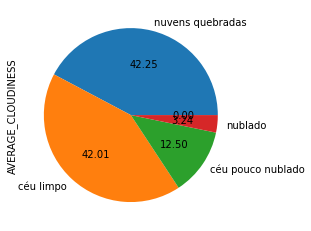

In [1712]:
y_train.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='AVERAGE_CLOUDINESS'>

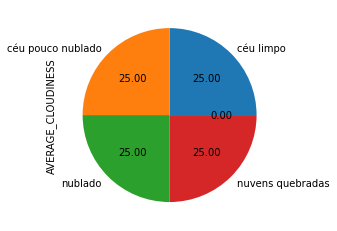

In [1713]:
y_res.value_counts().plot.pie(autopct='%.2f')

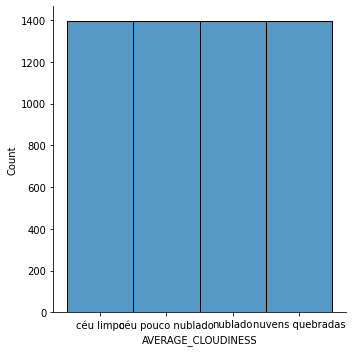

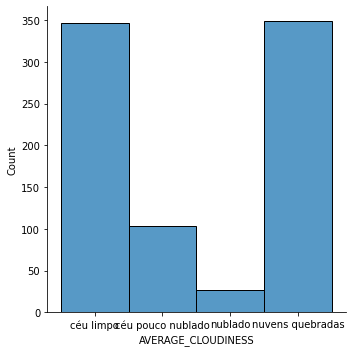

In [1714]:
sns.displot(y_res)
sns.displot(y_test)

In [1715]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [1716]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
#cv = cross_val_score(gnb,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [1717]:
lr = LogisticRegression(random_state=2021,max_iter = 90000000000000)
#cv = cross_val_score(lr,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [1718]:
dt = tree.DecisionTreeClassifier(random_state=2021)
#cv = cross_val_score(dt,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [1719]:
knn = KNeighborsClassifier()
#cv = cross_val_score(knn,X_res.values,y_res.values,cv=5)
#print(cv)
#print(cv.mean())

In [1720]:
rf = RandomForestClassifier(random_state=2021)
cv = cross_val_score(rf,X_res,y_res,cv=5)
print(cv)
print(cv.mean())

[0.74306177 0.84780662 0.86213071 0.84512086 0.81362007]
0.8223480071748763


In [1721]:
svc = SVC(probability = True,random_state=2021)
#cv = cross_val_score(svc,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [1722]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=2021)
#cv = cross_val_score(xgb,X_res,y_res,cv=5)
#print(cv)
#print(cv.mean())

In [1723]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [1724]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [1725]:
'''
param_grid = {'max_iter' : [200000000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_res,y_res)
clf_performance(best_clf_lr,'Logistic Regression')
'''

"\nparam_grid = {'max_iter' : [200000000],\n              'penalty' : ['l1', 'l2'],\n              'C' : np.logspace(-4, 4, 20),\n              'solver' : ['liblinear']}\n\nclf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_lr = clf_lr.fit(X_res,y_res)\nclf_performance(best_clf_lr,'Logistic Regression')\n"

In [1726]:
'''
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_res,y_res.values)
clf_performance(best_clf_knn,'KNN')
'''

"\nparam_grid = {'n_neighbors' : [3,5,7,9],\n              'weights' : ['uniform', 'distance'],\n              'algorithm' : ['auto', 'ball_tree','kd_tree'],\n              'p' : [1,2]}\nclf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_knn = clf_knn.fit(X_res,y_res.values)\nclf_performance(best_clf_knn,'KNN')\n"

In [1727]:
param_grid =  {'n_estimators': [100,200,500,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest
Best Score: 0.8361387870094947
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': False}


In [1728]:
param_grid =  {'n_estimators': [550],
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [50],
               'criterion': ['entropy'],
               'bootstrap': [False]}
                                  
clf_rf = GridSearchCV(rf, param_grid= param_grid,cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest
Best Score: 0.8368540284877246
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 550}


In [1729]:
'''
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]

clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_res,y_res)
clf_performance(best_clf_svc,'SVC')
'''

"\nparam_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],\n                                  'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]\n\nclf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_svc = clf_svc.fit(X_res,y_res)\nclf_performance(best_clf_svc,'SVC')\n"

<AxesSubplot:>

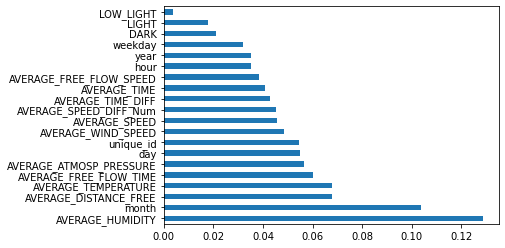

In [1730]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [1731]:
'''
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_res,y_res)
clf_performance(best_clf_xgb,'XGB')
'''

"\nparam_grid = {\n    'n_estimators': [450,500,550],\n    'colsample_bytree': [0.75,0.8,0.85],\n    'max_depth': [None],\n    'reg_alpha': [1],\n    'reg_lambda': [2, 5, 10],\n    'subsample': [0.55, 0.6, .65],\n    'learning_rate':[0.5],\n    'gamma':[.5,1,2],\n    'min_child_weight':[0.01],\n    'sampling_method': ['uniform']\n}\n\nclf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X_res,y_res)\nclf_performance(best_clf_xgb,'XGB')\n"

In [1732]:
lr.fit(X_res,y_res)
dt.fit(X_res,y_res)
knn.fit(X_res,y_res)
rf.fit(X_res,y_res)
xgb.fit(X_res,y_res)

C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Krow\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encod

[18:36:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1733]:
predictions2 = rf.predict(X_test)

In [1734]:
predictions = best_clf_rf.predict(X_test)

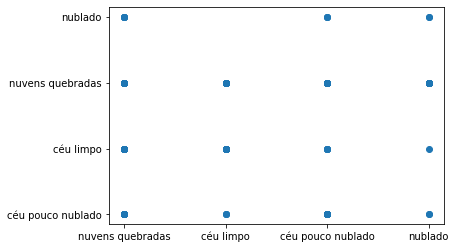

In [1735]:
plt.scatter(y_test,predictions)

In [1736]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

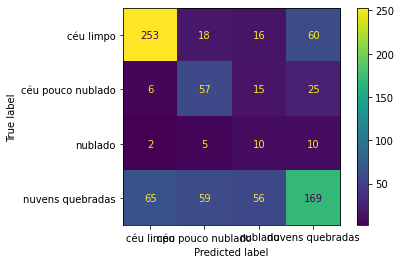

In [1737]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

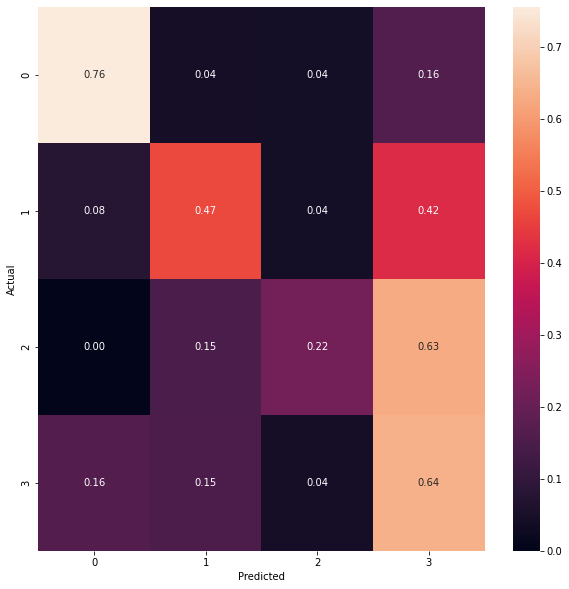

In [1738]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

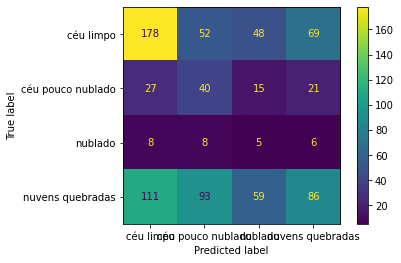

In [1739]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

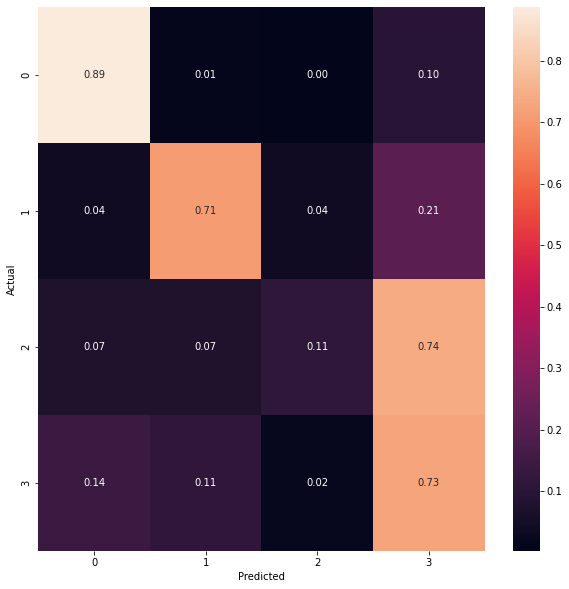

In [1740]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

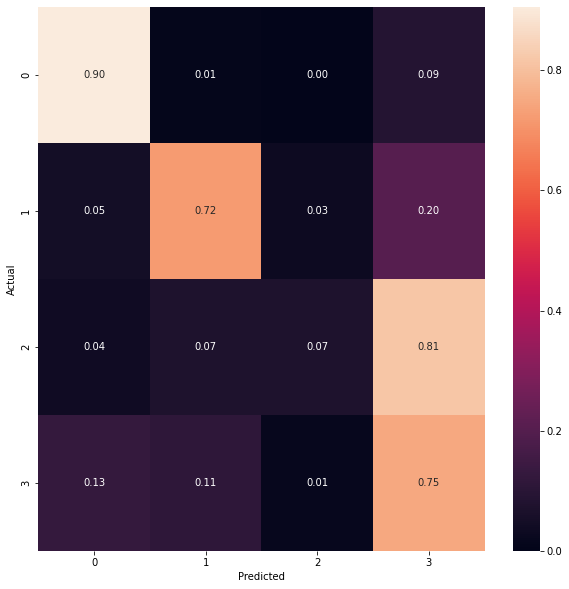

In [1741]:
y_pred = best_clf_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

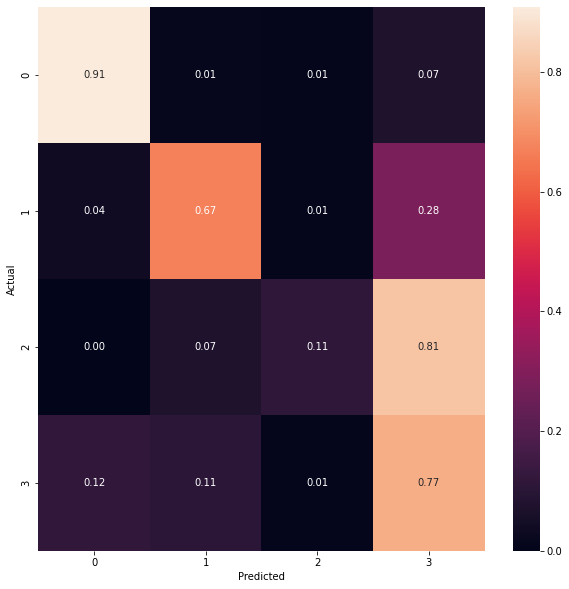

In [1742]:
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [1743]:
testing = naCloud

In [1744]:
#testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_FREE_FLOW_SPEED','AVERAGE_FREE_FLOW_TIME','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_DISTANCE_FREE','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

In [1745]:
prediction = best_clf_rf.predict(testing)

In [1746]:
prediction

array(['nuvens quebradas', 'céu pouco nublado', 'nuvens quebradas', ...,
       'nuvens quebradas', 'céu pouco nublado', 'céu pouco nublado'],
      dtype=object)

In [1747]:
naCloud['AVERAGE_CLOUDINESS'] = prediction

In [1748]:
naCloud.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,...,weekday,hour,month,year,day,unique_id,DARK,LIGHT,LOW_LIGHT,AVERAGE_CLOUDINESS
0,41.5,11.5,71.4,15.0,1019.0,100.0,3.0,2963.10,82.9,35.743064,...,3,7,8,2019,29,1,0,1,0,nuvens quebradas
2,38.6,38.4,85.2,26.0,1014.0,61.0,4.0,3288.72,123.6,26.607767,...,6,16,9,2019,1,3,0,1,0,céu pouco nublado
4,41.6,50.4,77.0,15.0,1008.0,82.0,10.0,3203.20,127.4,25.142857,...,3,12,6,2019,6,5,0,1,0,nuvens quebradas
10,42.5,14.1,75.1,18.0,1015.0,100.0,1.0,3191.75,89.2,35.781951,...,6,22,8,2019,25,11,1,0,0,céu pouco nublado
11,46.8,2.4,75.5,14.0,1017.0,100.0,11.0,3533.40,77.9,45.358151,...,3,6,7,2019,18,12,0,1,0,nuvens quebradas


In [1749]:
test = pd.concat([naCloud, cloud], ignore_index=True).sort_values(by='unique_id',ascending=True)

In [1750]:
test.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,...,weekday,hour,month,year,day,unique_id,DARK,LIGHT,LOW_LIGHT,AVERAGE_CLOUDINESS
0,41.5,11.5,71.4,15.0,1019.0,100.0,3.0,2963.10,82.9,35.743064,...,3,7,8,2019,29,1,0,1,0,nuvens quebradas
2682,41.7,48.3,87.4,21.0,1021.0,53.0,5.0,3644.58,135.7,26.857627,...,4,14,8,2018,10,2,0,1,0,céu limpo
1,38.6,38.4,85.2,26.0,1014.0,61.0,4.0,3288.72,123.6,26.607767,...,6,16,9,2019,1,3,0,1,0,céu pouco nublado
2683,37.4,61.0,94.1,18.0,1025.0,48.0,4.0,3519.34,155.1,22.690780,...,1,11,2,2019,26,4,0,1,0,céu limpo
2,41.6,50.4,77.0,15.0,1008.0,82.0,10.0,3203.20,127.4,25.142857,...,3,12,6,2019,6,5,0,1,0,nuvens quebradas


In [1751]:
final = test[['unique_id','AVERAGE_CLOUDINESS']]

In [1752]:
final.head()

,unique_id,AVERAGE_CLOUDINESS
0,1,nuvens quebradas
2682,2,céu limpo
1,3,céu pouco nublado
2683,4,céu limpo
2,5,nuvens quebradas


In [1753]:
training = training.drop(['AVERAGE_CLOUDINESS'],axis=1)

In [1754]:
training = training.merge(final,on='unique_id',how='left')

In [1755]:
training = training.drop(['unique_id','weekday','hour','month'],axis=1)

In [1756]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,AVERAGE_RAIN,AVERAGE_DISTANCE_FREE,AVERAGE_TIME,AVERAGE_SPEED,AVERAGE_SPEED_DIFF_Num,year,day,AVERAGE_CLOUDINESS
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,0.0,NOTHING,2963.10,82.9,35.743064,5.756936,2019,29,nuvens quebradas
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,0.0,NOTHING,3644.58,135.7,26.857627,14.842373,2018,10,céu limpo
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,0.0,NOTHING,3288.72,123.6,26.607767,11.992233,2019,1,céu pouco nublado
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,0.0,NOTHING,3519.34,155.1,22.690780,14.709220,2019,26,céu limpo
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,0.0,NOTHING,3203.20,127.4,25.142857,16.457143,2019,6,nuvens quebradas


In [1757]:
training.to_csv('cloudTrain.csv',index=False)
#training.to_csv('cloudTest.csv',index=False)